In [1]:
import numpy as np

from keras.layers import Embedding
from keras.models import Sequential

import utilities

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# https://keras.io/layers/embeddings/#embedding 
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

In [8]:
model = Sequential([Embedding(input_dim=100, output_dim=8)])
model.compile('rmsprop', 'mse')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 8)           800       
Total params: 800
Trainable params: 800
Non-trainable params: 0
_________________________________________________________________


In [27]:
assert 100 * 8 == 800

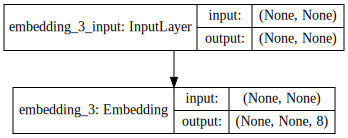

In [10]:
utilities.plot_keras_model(model)

In [11]:
utilities.print_weights_shape(model)

-------------
(100, 8)


In [12]:
weights = model.get_weights()[0]

In [13]:
weights.shape

(100, 8)

In [15]:
x = np.random.choice(a=100, size=(200, 10))

In [16]:
x.shape

(200, 10)

In [17]:
output = model.predict(x)

In [18]:
output.shape

(200, 10, 8)

In [19]:
x[0].shape

(10,)

In [20]:
output[0].shape

(10, 8)

In [21]:
x[0]

array([55, 12, 88, 37, 50, 50, 29, 30, 77, 93])

In [22]:
output[0][0]

array([-0.00486311, -0.04928553, -0.04233852,  0.03105083, -0.04630876,
       -0.03515921,  0.01867949, -0.0286531 ], dtype=float32)

In [23]:
weights[x[0][0]]

array([-0.00486311, -0.04928553, -0.04233852,  0.03105083, -0.04630876,
       -0.03515921,  0.01867949, -0.0286531 ], dtype=float32)

In [24]:
np.alltrue(output[0][0]==weights[x[0][0]])

True

In [25]:
np.alltrue(output[2][3]==weights[x[2][3]])

True

In [26]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        assert np.alltrue(output[i][j]==weights[x[i][j]])